<a href="https://colab.research.google.com/github/Vanluan39/FINAL_AI/blob/main/Facial_2Acupoint_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PHẦN TRAINING**

In [36]:
# 0. Link colab với Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#####  LOADING AND EXTRACTING DATA   #####
##import các thư viện
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle


def data_loader():
    
    # Load dataset file
    data_frame = pd.read_csv('/content/drive/MyDrive/FINAL_AI/FINAL_AI/training.csv')
    # xử lí ảnh
    data_frame['Image'] = data_frame['Image'].apply(lambda i: np.fromstring(i, sep=' '))
    # loại bỏ dữ liệu còn thiếu
    data_frame = data_frame.dropna()  # Get only the data with 15 keypoints
   
    # Extract Images pixel values
    #trích xuất giá trị pixel của ảnh từ cột
    imgs_array = np.vstack(data_frame['Image'].values)/ 255.0
    #chuyển đổi kiểu dữ liệu
    imgs_array = imgs_array.astype(np.float32)    # Normalize, target values to (0, 1)
    imgs_array = imgs_array.reshape(-1, 96, 96, 1)
        
    # Extract labels (key point cords)
    labels_array = data_frame[data_frame.columns[:-1]].values
    labels_array = (labels_array - 48) / 48    # Normalize, traget cordinates to (-1, 1)
    labels_array = labels_array.astype(np.float32) 
    
    # shuffle the train data
    imgs_array, labels_array = shuffle(imgs_array, labels_array, random_state=9)  
    
    return imgs_array, labels_array



In [39]:
######   BUILD, TRAIN AND SAVE THE CONVOLUTIONAL MODEL    ########

#import các thư viện
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
#from keras.optimizers import Adam


# Main model
#xây dựng một mô hình mạng nơ-ron sử dụng kiến trúc CNN
def the_model():
  #Khởi tạo một đối tượng Sequential
    model = Sequential()
    #Thêm một lớp Conv2D vào mô hình với 16 bộ lọc, kích thước bộ lọc là (3,3)
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:])) # Input shape: (96, 96, 1)
    #Thêm một lớp MaxPooling2D để giảm kích thước đầu ra
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(30))
    
    return model

#tải dữ liệu huấn luyện và gán kết quả
X_train, y_train = data_loader()
#In ra thông tin về kích thước của dữ liệu huấn luyện
print("Training datapoint shape: X_train.shape:{}".format(X_train.shape))
print("Training labels shape: y_train.shape:{}".format(y_train.shape))

#vòng lặp huấn luyện
epochs = 100
#Đặt giá trị cho mỗi batch
batch_size = 64
# khởi tạo mô hình mạng nơ-ron và lưu thông tin
model = the_model()
hist = History()

#lưu trữ trọng số của mô hình 
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/FINAL_AI/FINAL_AI/checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

# Complie Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#Huấn luyện mô hình trên dữ liệu huấn luyện 
model_fit = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)
#Lưu trữ mô hình đã huấn luyện
model.save('/content/drive/MyDrive/FINAL_AI/FINAL_AI/model1.h5')

Training datapoint shape: X_train.shape:(2140, 96, 96, 1)
Training labels shape: y_train.shape:(2140, 30)
Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.4486
Epoch 1: val_loss improved from inf to 0.00643, saving model to /content/drive/MyDrive/FINAL_AI/FINAL_AI/checkpoint1.hdf5
27/27 [==============================] - 4s 66ms/step - loss: 0.0239 - accuracy: 0.4486 - val_loss: 0.0064 - val_accuracy: 0.7126
Epoch 2/100
25/27 [==========================>...] - ETA: 0s - loss: 0.0077 - accuracy: 0.6225
Epoch 2: val_loss improved from 0.00643 to 0.00486, saving model to /content/drive/MyDrive/FINAL_AI/FINAL_AI/checkpoint1.hdf5
27/27 [==============================] - 1s 24ms/step - loss: 0.0076 - accuracy: 0.6203 - val_loss: 0.0049 - val_accuracy: 0.7126
Epoch 3/100
26/27 [===========================>..] - ETA: 0s - loss: 0.0063 - accuracy: 0.6629
Epoch 3: val_loss improved from 0.00486 to 0.00481, saving model to /content/drive/MyDrive/FINAL_AI/F

1/1 [==============================] - 0s 93ms/step


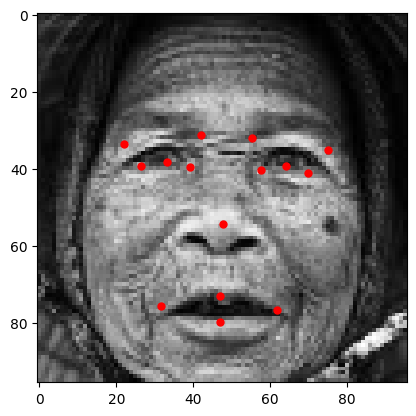

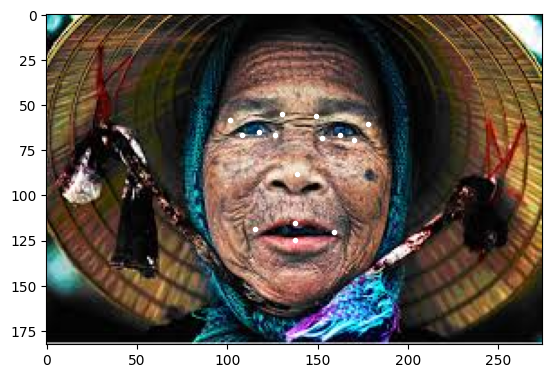

In [40]:
#####  TEST YOUR IMAGE FILE WITH THE MODEL  #####

#import các thư viện
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

# Load the saved model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/FINAL_AI/FINAL_AI/model1.h5')  # <-- Saved model path

# dự đoán các điểm đặc trưng trên khuôn mặt
def detect_points(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points
    
# Load haarcascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/FINAL_AI/FINAL_AI/haarcascade_frontalface_alt.xml')
dimensions = (96, 96)

# Enter the path to your test image
img = cv2.imread('/content/drive/MyDrive/FINAL_AI/FINAL_AI/anh (8).jpg')

default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
#faces = face_cascade.detectMultiScale(gray_img, 4, 6)

faces_img = np.copy(gray_img)

plt.rcParams["axes.grid"] = False


all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'ro', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=3)
plt.show()

1/1 [==============================] - 0s 95ms/step


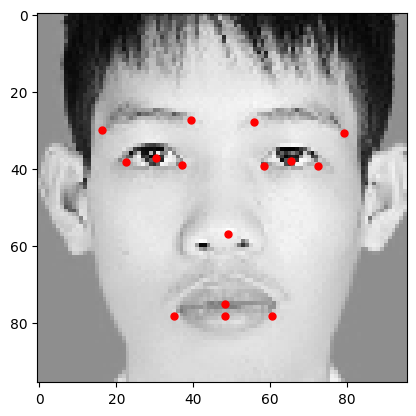

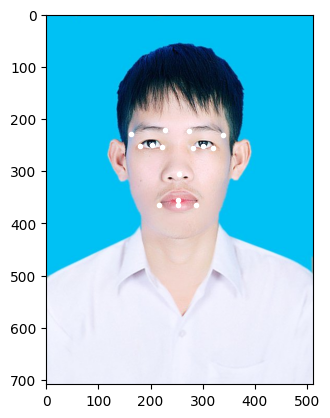

In [41]:
#####  TEST YOUR IMAGE FILE WITH THE MODEL  #####

#import thư viện
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

# Load the saved model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/FINAL_AI/FINAL_AI/model1.h5')  # <-- Saved model path


def detect_points(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points
    
# Load haarcascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/FINAL_AI/FINAL_AI/haarcascade_frontalface_alt.xml')
dimensions = (96, 96)

# Enter the path to your test image
img = cv2.imread('/content/drive/MyDrive/FINAL_AI/FINAL_AI/hinh.jpg')

default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
# faces = face_cascade.detectMultiScale(gray_img, 4, 6)

faces_img = np.copy(gray_img)

plt.rcParams["axes.grid"] = False


all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'ro', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=3)
plt.show()

**PHẦN LÀM GIAO DIỆN VÀ TEST WEBCAM**

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


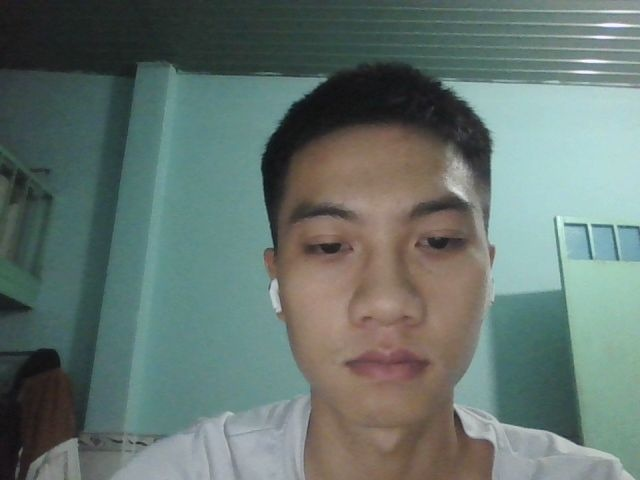

1/1 [==============================] - 0s 139ms/step


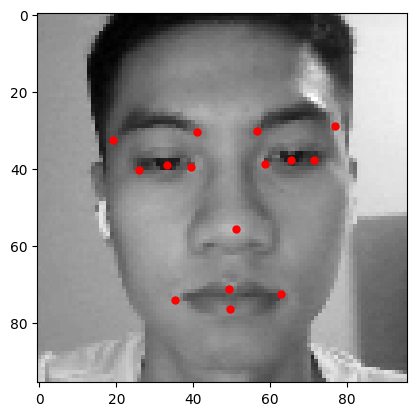

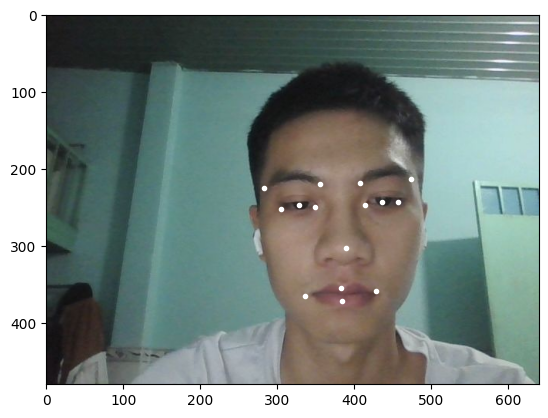

In [42]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
 
  # save image
  cv2.imwrite(filename, img)

  return filename

from keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/FINAL_AI/FINAL_AI/model1.h5')  # <-- Saved model path

try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))

    def detect_points(face_img):
        me = np.array(face_img) / 255
        x_test = np.expand_dims(me, axis=0)
        x_test = np.expand_dims(x_test, axis=3)

        y_test = model.predict(x_test)
        label_points = (np.squeeze(y_test) * 48) + 48

        return label_points

    # Load haarcascade
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/FINAL_AI/FINAL_AI/haarcascade_frontalface_alt.xml')
    dimensions = (96, 96)

    # Read the captured image
    img = cv2.imread(filename)

    default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    # faces = face_cascade.detectMultiScale(gray_img, 4, 6)

    faces_img = np.copy(gray_img)

    plt.rcParams["axes.grid"] = False

    all_x_cords = []
    all_y_cords = []

    for i, (x, y, w, h) in enumerate(faces):
        h += 10
        w += 10
        x -= 5
        y -= 5

        just_face = cv2.resize(gray_img[y:y+h, x:x+w], dimensions)
        cv2.rectangle(faces_img, (x, y), (x+w, y+h), (255, 0, 0), 1)

        scale_val_x = w / 96
        scale_val_y = h / 96

        label_point = detect_points(just_face)
        all_x_cords.append((label_point[::2] * scale_val_x) + x)
        all_y_cords.append((label_point[1::2] * scale_val_y) + y)

        plt.imshow(just_face, cmap='gray')
        plt.plot(label_point[::2], label_point[1::2], 'ro', markersize=5)
        plt.show()

    plt.imshow(default_img)
    plt.plot(all_x_cords, all_y_cords, 'wo', markersize=3)
    plt.show()

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))